In [1]:
#Execute this cell if have problem with relative import

import sys; sys.path.insert(0, '..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import json

In [3]:
from Preprocessing.data_keys import get_decade, get_player_type_by_key, get_country_by_key

In [4]:
players_mlb = {}
with open("../Data/mlb_players.json", 'r') as json_file:
    players_mlb:dict = json.load(json_file)

In [75]:
actives,non_actives = 0,0
in_mayors,in_negro_league,in_negro_and_mlb = 0,0,0

plus_than_2_years,plus_than_4_years,plus_than_6_years,plus_than_9_years = 0,0,0,0

as_player_hof, hof_type, hof_number_of_seasons = 0, {}, {}

hof_nationality, all_players_nationality= {},{}

induction_year, induction_decade_dic = {}, {}
induction_decade_list, retirament_decade_list = [], []

hall_players_type, all_players_type = {1:0,2:0}, {1:0,2:0}

two_way_all, two_way_hall = 0, 0

hall_player_number_of_games = {}
hall_player_pitchers_number_of_games, hall_player_batters_number_of_games = {},{}
batter_in_hall,pitcher_in_hall= {},{}

all_batters, all_pitchers = {},{}

for p_id in players_mlb.keys():
    player = players_mlb[p_id]
    if player["Active"]:
        actives +=1
    else:
        non_actives+=1
    p_t = player["Player type"]
    all_players_type[p_t]+=1
    if p_t == 1:
        all_pitchers[p_id] = player
    elif p_t == 2:
        all_batters[p_id] = player
    if player['play_in_mayors']:
        in_mayors+=1
    if player['play_in_negro_league']:
        in_negro_league+=1
        if player['play_in_mayors']:
            in_negro_and_mlb+=1
    if player['two_way_player']:
        two_way_all+=1
    if all_players_nationality.get(player['Country']) == None:
        all_players_nationality[player['Country']] = 1
    else:
        all_players_nationality[player['Country']]+=1
    total_seasons = int(player["total_seasons"])
    if total_seasons > 9:
        plus_than_9_years+=1
        plus_than_6_years+=1
        plus_than_4_years+=1
        plus_than_2_years+=1
    elif total_seasons > 6:
        plus_than_6_years+=1
        plus_than_4_years+=1
        plus_than_2_years+=1
    elif total_seasons>4:
        plus_than_4_years+=1
        plus_than_2_years+=1
    elif total_seasons>2:
        plus_than_2_years+=1
    if player["HoF"] == 1:       
        h_type = player["HoF type"].lower()
        if 'player' == h_type:
            player_type = player["Player type"]
            hall_players_type[player_type]+=1
            if player['two_way_player']:
                two_way_hall+=1
            if hof_nationality.get(player['Country']) == None:
                hof_nationality[player['Country']] = 1
            else:
                hof_nationality[player['Country']]+=1
            as_player_hof +=1
            if hof_number_of_seasons.get(total_seasons)==None:
                hof_number_of_seasons[total_seasons] = 1
            else:
                hof_number_of_seasons[total_seasons] += 1
            i_year = int(player["HoF year"])
            if induction_year.get(i_year) == None:
                induction_year[i_year] = 1
            else:
                induction_year[i_year] +=1
            i_decade = get_decade(i_year)
            if induction_decade_dic.get(i_decade) == None:
                induction_decade_dic[i_decade] = 1
            else:
                induction_decade_dic[i_decade] += 1
            induction_decade_list.append(i_decade)
            r_decade = get_decade(int(player["Last year"]))
            retirament_decade_list.append(r_decade)
            games = 0
            if player_type == 1: #P
                pitcher_in_hall[player['Id']] = player
                games = player['pitcher_stats']['G']['summary']
                if hall_player_pitchers_number_of_games.get(games) == None:
                    hall_player_pitchers_number_of_games[games] = 1
                else:
                    hall_player_pitchers_number_of_games[games]+=1
            elif player_type == 2: #B
                batter_in_hall[player['Id']] = player
                games = player['batter_stats']['G']['summary']
                if hall_player_batters_number_of_games.get(games) == None:
                    hall_player_batters_number_of_games[games] = 1
                else:
                    hall_player_batters_number_of_games[games]+=1
            if hall_player_number_of_games.get(games) == None:
                hall_player_number_of_games[games] = 1
            else:
                hall_player_number_of_games[games]+=1
        if hof_type.get(h_type) == None:
            hof_type[h_type] = 1
        else:
            hof_type[h_type]+=1
        

In [6]:
print(f"{plus_than_2_years}-->{plus_than_4_years}-->{plus_than_6_years}-->{plus_than_9_years}")


12735-->8840-->6360-->3788


In [7]:
from pprint import pprint
pprint(induction_decade_dic)

{1930: 16,
 1940: 29,
 1950: 21,
 1960: 26,
 1970: 45,
 1980: 30,
 1990: 30,
 2000: 33,
 2010: 30,
 2020: 8}


In [8]:
pprint(hall_players_type)

{1: 72, 2: 196}


In [77]:
pprint(all_players_type)

{1: 9707, 2: 12975}


In [78]:
##Proportion hof for type of player
for t in hall_players_type.keys():
    print(f"{get_player_type_by_key(t)} : {(hall_players_type[t]/all_players_type[t])*100}")
print(f"Two-way : {round((two_way_hall/two_way_all)*100,2)}")

Pitcher : 0.7417327701658597
Batter : 1.510597302504817
Two-way : 8.55


In [79]:
##Proportion for nationality
total_players = len(players_mlb.keys())
for t in hof_nationality.keys():
    mlb = all_players_nationality[t]
    hof = hof_nationality[t]
    print(f"{t}: in mlb {mlb} in hall {hof}  {round((hof/mlb)*100,2)}%")

us: in mlb 18766 in hall 248  1.32%
ve: in mlb 448 in hall 1  0.22%
pr: in mlb 302 in hall 4  1.32%
nl: in mlb 11 in hall 1  9.09%
pa: in mlb 78 in hall 2  2.56%
cu: in mlb 380 in hall 6  1.58%
do: in mlb 845 in hall 4  0.47%
ca: in mlb 259 in hall 2  0.77%


In [12]:
pprint(hof_nationality)

{'ca': 2, 'cu': 6, 'do': 4, 'nl': 1, 'pa': 2, 'pr': 4, 'us': 248, 've': 1}


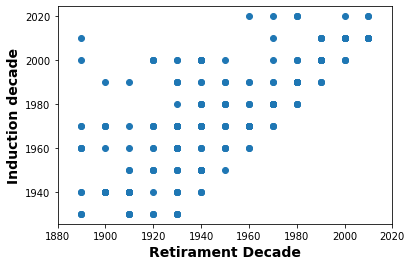

In [13]:
fig, ax = plt.subplots()
ax.scatter(x=retirament_decade_list, y =induction_decade_list)
ax.set_xlabel("Retirament Decade", fontdict = {'fontsize':14, 'fontweight':'bold'})
ax.set_xlim([1880, 2020])
ax.set_ylabel("Induction decade", fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.show()

In [80]:
print(f"In mayors:{in_mayors}")
print(f"In negro Leagues:{in_negro_league}")
print(f"In negro league and mayors:{in_negro_and_mlb}")

In mayors:20399
In negro Leagues:2432
In negro league and mayors:153


In [81]:
as_player_hof

268

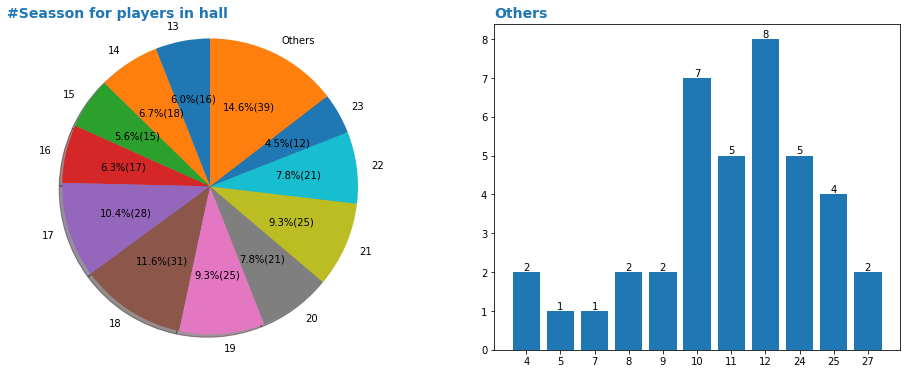

In [82]:
##pprint(hof_number_of_seasons)

others= [str(x) for x in [4,5,7,8,9,10,11,12,24,25,27]]
other_count = [2,1,1,2,2,7,5,8,5,4,2]

p_count =  [16,18,15,17,28,31,25,21,25,21,12,39]
p_labels = [13,14,15,16,17,18,19,20,21,22,23,"Others"]

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%({next(gen)})"

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 6))
ax1.pie(p_count, labels=p_labels, autopct=autopct_fun(p_count), shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('#Seasson for players in hall', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax2.bar(others, other_count, color='blue')
x = np.arange(len(other_count))
ax2.bar_label(ax2.bar(x, other_count))
ax2.set_title('Others', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()


In [83]:
def boxplot_data_from_dict(dict):   
    n = []
    for d in dict:
        n.extend([d]*dict[d])
    return n


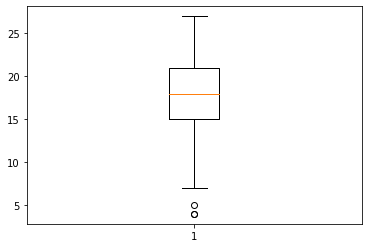

In [84]:
# NUmbre of seasson HoF players
fig,ax = plt.subplots()
ax.boxplot(boxplot_data_from_dict(hof_number_of_seasons))
plt.show()

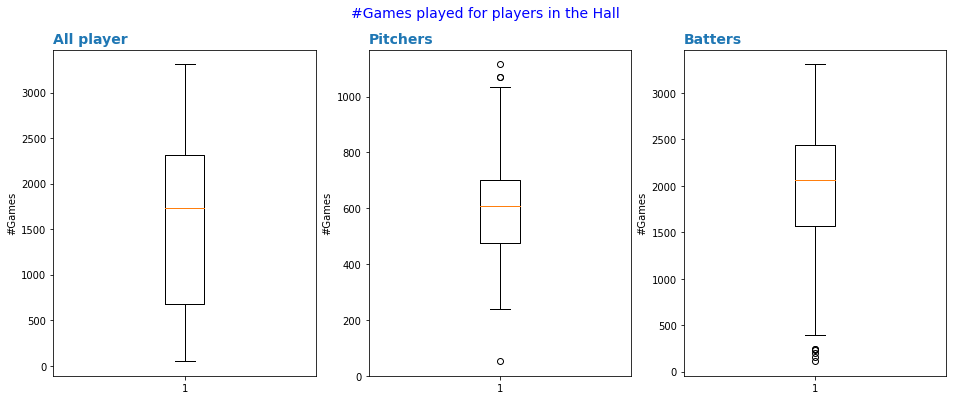

In [85]:
#number of games
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16, 6))
ax1.boxplot(boxplot_data_from_dict(hall_player_number_of_games))
ax1.set_title('All player', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax1.set_ylabel("#Games")

ax2.boxplot(boxplot_data_from_dict(hall_player_pitchers_number_of_games))
ax2.set_title('Pitchers', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax2.set_ylabel("#Games")

ax3.boxplot(boxplot_data_from_dict(hall_player_batters_number_of_games))
ax3.set_title('Batters', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax3.set_ylabel("#Games")

fig.suptitle("#Games played for players in the Hall", size=14, color='blue')

plt.show()

In [86]:
def batter_seasson_avg_Calc(stat, games, seasson_factor=164,r=0):
    player_factor = games/seasson_factor
    return round((stat/player_factor),r)

def pitcher_seasson_avg_Calc(stat, games_plus_games_started, seasson_factor=68,r=0):
    player_factor = games_plus_games_started/seasson_factor
    return round((stat/player_factor),r)


In [93]:
def view_bat_stats(players, title=""):
    r_decade = []
    g_s, total_seasons = [],[]
    hr, h, pa, ba, obp, slg, ops, ops_p=[],[],[],[],[],[],[],[]
    rbi, cs, bb, so, s_b, tb, r = [],[],[],[],[],[],[]
    rbat, rbaser, rfield, rpos, raa, waa, rrep = [],[],[],[],[],[],[]
    rar, war, owar,dwar, orar = [],[],[],[],[]
    for p in players:
        try:
            r_decade.append(get_decade(players[p]["Last year"]))
            total_seasons.append(players[p]["total_seasons"])
            b_stats = players[p]["batter_stats"]
            g = b_stats["G"]["summary"]
            g_s.append(g)
            hr.append(batter_seasson_avg_Calc(b_stats["HR"]["summary"],g))
            h.append( batter_seasson_avg_Calc(b_stats["H"]["summary"] ,g))
            pa.append(batter_seasson_avg_Calc(b_stats["PA"]["summary"],g))
            ba.append(b_stats["BA"]["summary"])
            obp.append(b_stats["OBP"]["summary"])
            slg.append(b_stats["SLG"]["summary"])
            ops.append(b_stats["OPS"]["summary"])
            ops_p.append(b_stats["OPS+"]["summary"])
            rbi.append(batter_seasson_avg_Calc(b_stats["RBI"]["summary"],g))
            cs_i = b_stats["CS"]["summary"] if isinstance(b_stats["CS"]["summary"], float) else 0
            cs.append(batter_seasson_avg_Calc(cs_i,g))
            bb.append(batter_seasson_avg_Calc(b_stats["BB"]["summary"],g))
            so_i = b_stats["SO"]["summary"] if isinstance(b_stats["SO"]["summary"], float) else 0
            so.append(batter_seasson_avg_Calc(so_i,g))
            sb_i = b_stats["SB"]["summary"] if isinstance(b_stats["SB"]["summary"], float) else 0
            s_b.append(batter_seasson_avg_Calc(sb_i,g))
            tb.append(batter_seasson_avg_Calc(b_stats["TB"]["summary"],g))
            r.append( batter_seasson_avg_Calc(b_stats["R"]["summary"] ,g))
            rbat.append(batter_seasson_avg_Calc(b_stats["Rbat"]["summary"],g))
            rbaser.append(batter_seasson_avg_Calc(b_stats["Rbaser"]["summary"],g))
            rfield.append(batter_seasson_avg_Calc(b_stats["Rfield"]["summary"],g))
            rpos.append(batter_seasson_avg_Calc(b_stats["Rpos"]["summary"],g))
            raa.append( batter_seasson_avg_Calc(b_stats["RAA"]["summary"],g))
            waa.append( batter_seasson_avg_Calc(b_stats["WAA"]["summary"],g))
            rrep.append(batter_seasson_avg_Calc(b_stats["Rrep"]["summary"],g))
            rar.append( batter_seasson_avg_Calc(b_stats["RAR"]["summary"],g))
            war.append( batter_seasson_avg_Calc(b_stats["WAR"]["summary"],g))
            owar.append(batter_seasson_avg_Calc(b_stats["oWAR"]["summary"],g))
            dwar.append(batter_seasson_avg_Calc(b_stats["dWAR"]["summary"],g))
            orar.append(batter_seasson_avg_Calc(b_stats["oRAR"]["summary"],g))
        except Exception as e:
            print(p)
            print(players[p])
            #print(isinstance(b_stats["WAR"]["summary"],float))
            raise e
    fg1, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(16, 12))
    
    ax1.scatter(y=g_s, x=total_seasons)
    ax1.set_xlabel("Total Seasons")
    ax1.set_ylabel("#Games")

    ax2.boxplot(ba)
    ax2.set_ylabel("Bat Avg")

    ax3.boxplot(pa)
    ax3.set_ylabel("Bat Aparences 162-avg")

    ax4.boxplot(rbi)
    ax4.set_ylabel("RBI 162-avg")

    ax5.boxplot(ops_p)
    ax5.set_ylabel("ops+")

    ax6.boxplot(slg)
    ax6.set_ylabel("SLG")

    fg2, ((ax11,ax21,ax31),(ax41,ax51,ax61)) = plt.subplots(2,3,figsize=(16, 12))

    ax11.boxplot(ops)
    ax11.set_ylabel("OPS")

    ax21.boxplot(h)
    ax21.set_ylabel("H 162-avg")

    ax31.boxplot(hr)
    ax31.set_ylabel("HR 162-avg")

    ax41.boxplot(bb)
    ax41.set_ylabel("BB 162-avg")

    ax51.boxplot(so)
    ax51.set_ylabel("SO 162-avg")

    ax61.boxplot(tb)
    ax61.set_ylabel("TB 162-avg")

    fg3, ((ax12,ax22,ax32),(ax42,ax52,ax62)) = plt.subplots(2,3,figsize=(16, 12))

    ax12.boxplot(r)
    ax12.set_ylabel("R 162-avg")

    ax22.boxplot(rbat)
    ax22.set_ylabel("Rbat 162-avg")

    ax32.boxplot(rbaser)
    ax32.set_ylabel("Rbaser 162-avg")

    ax42.boxplot(rfield)
    ax42.set_ylabel("Rfield 162-avg")

    ax52.boxplot(rpos)
    ax52.set_ylabel("Rpos 162-avg")

    ax62.boxplot(rrep)
    ax62.set_ylabel("Rrep 162-avg")

    fg4, ((ax13,ax23,ax33),(ax43,ax53,ax63)) = plt.subplots(2,3,figsize=(16, 12))

    ax13.boxplot(raa)
    ax13.set_ylabel("RAA 162-avg")

    ax23.boxplot(waa)
    ax23.set_ylabel("WAA 162-avg")

    ax33.boxplot(rar)
    ax33.set_ylabel("RAR 162-avg")

    ax43.boxplot(war)
    ax43.set_ylabel("WAR 162-avg")

    ax53.boxplot(owar)
    ax53.set_ylabel("oWAR 162-avg")

    ax63.boxplot(dwar)
    ax63.set_ylabel("dWAR 162-avg")

    fg5, (ax14,ax24,ax34) = plt.subplots(1,3,figsize=(16, 6))
    
    ax14.boxplot(cs)
    ax14.set_ylabel("CS 162-avg")

    ax24.boxplot(s_b)
    ax24.set_ylabel("SB 162-avg")

    ax34.boxplot(orar)
    ax34.set_ylabel("oRAR 162-avg")

    fg1.suptitle(title, size=14, color='blue')

    plt.show()
    

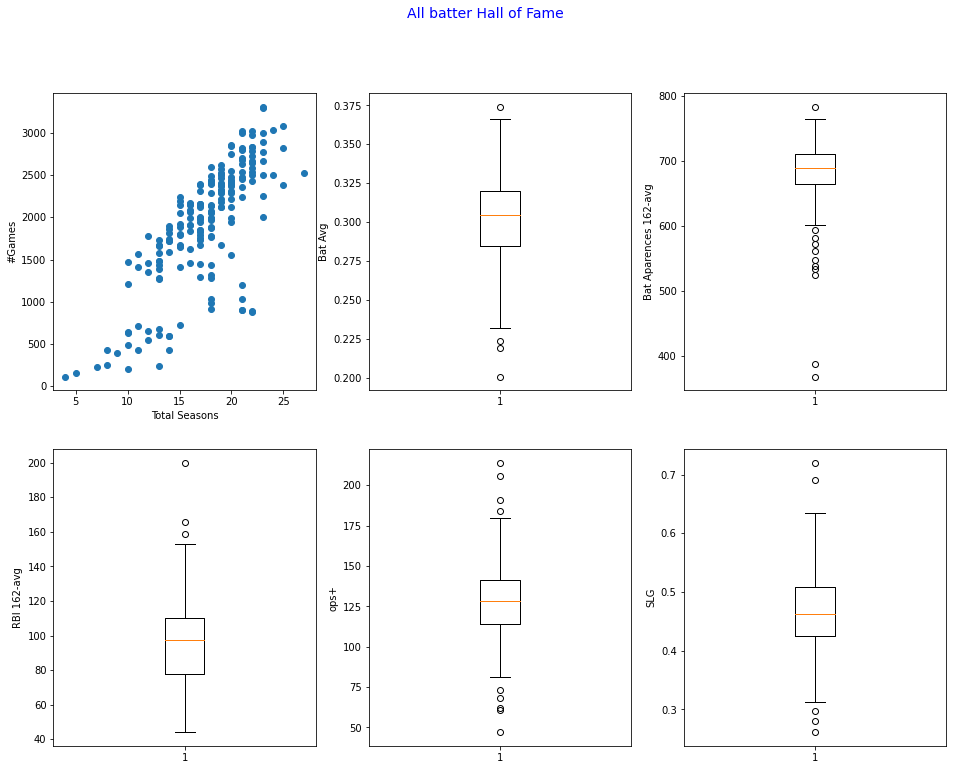

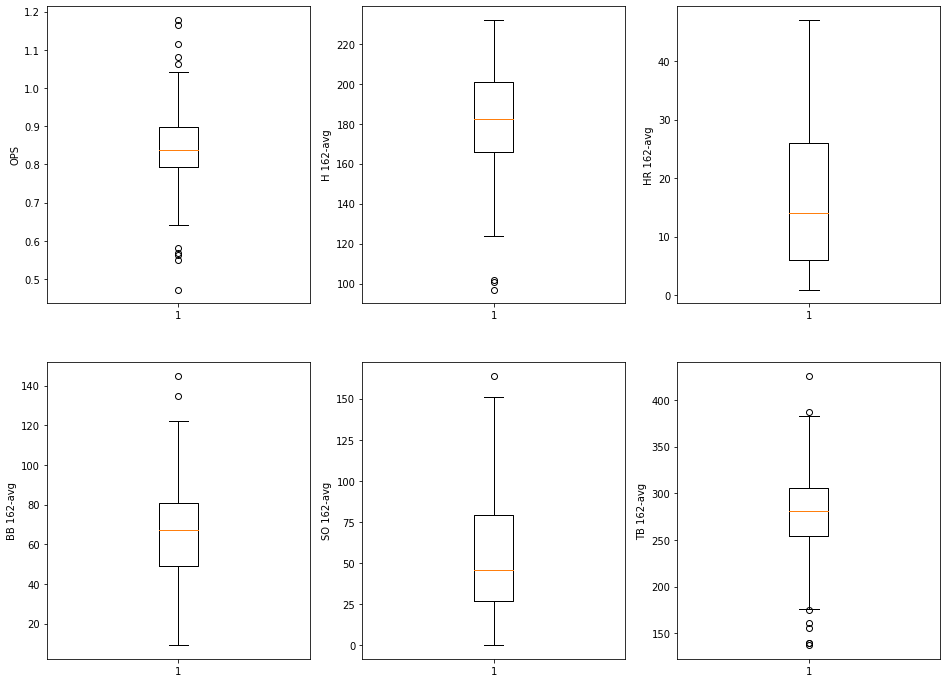

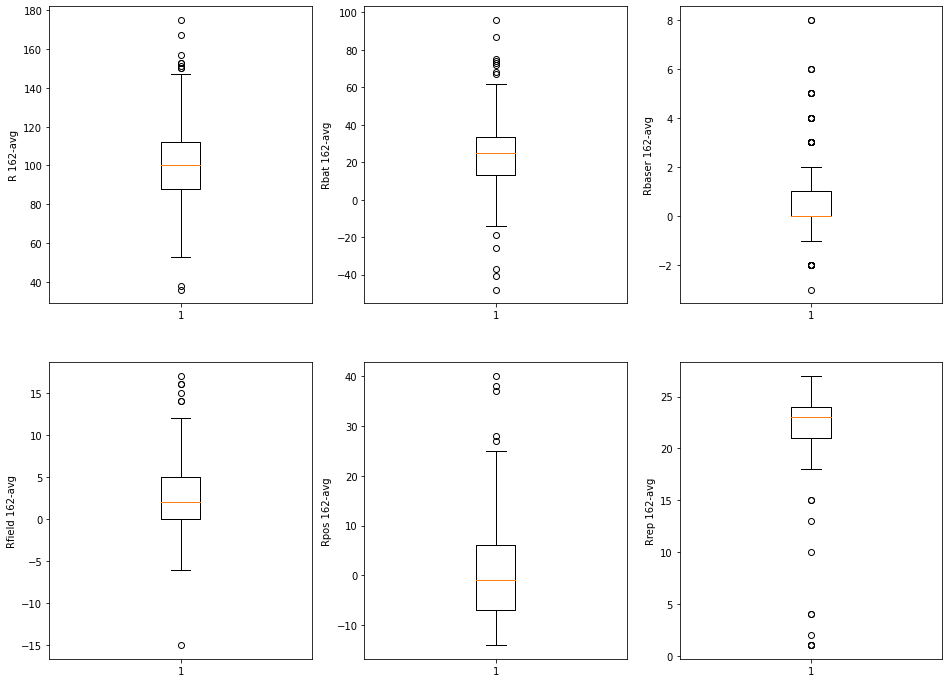

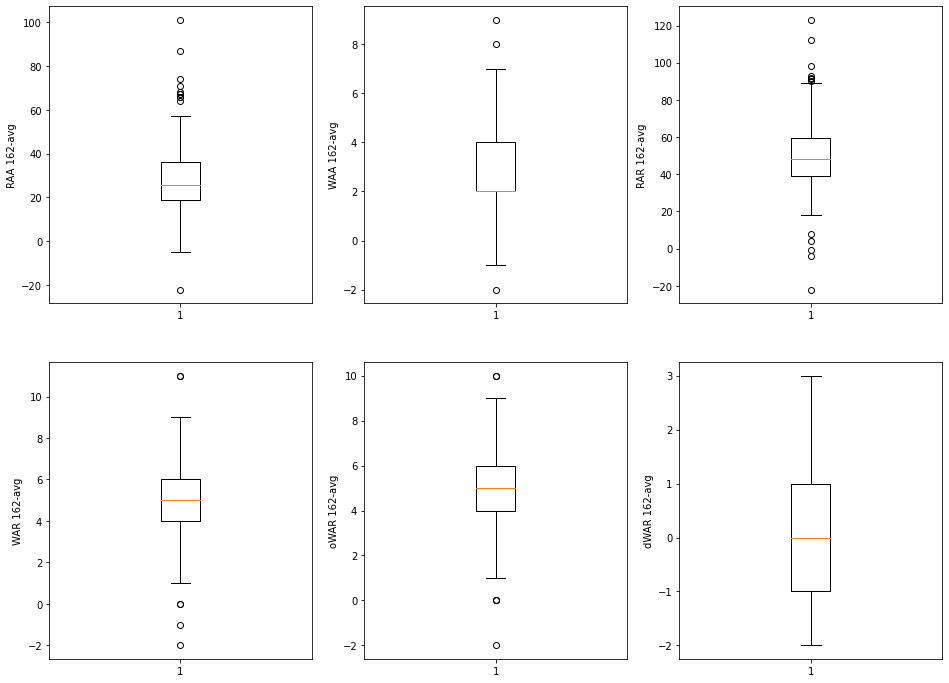

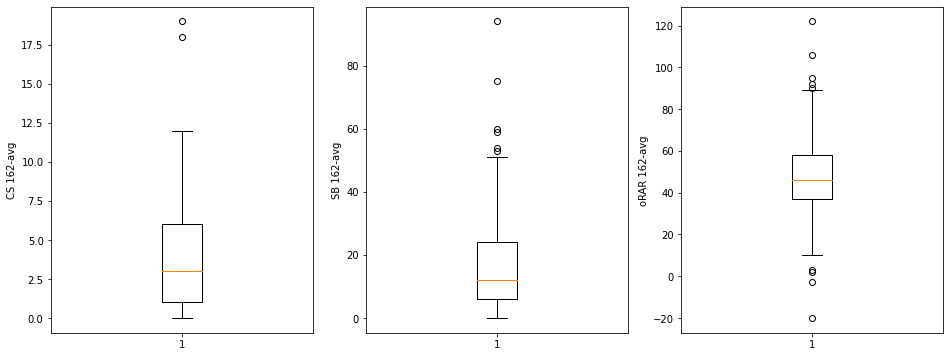

In [88]:
view_bat_stats(batter_in_hall, "All batter Hall of Fame")

In [60]:
def view_pit_stats(players, title=""):
    r_decade = []
    g_p, total_seasons = [],[]
    w, l, w_l_percent, era, gs, gf, cg, sho = [],[],[],[],[],[],[],[]
    sv, ip, h, r, er, bb, hr = [],[],[],[],[],[],[]
    ibb, so, hbp, bk, wp, bf, era_p, fip = [],[],[],[],[],[],[],[]
    whip, h9, hr9, bb9, so9, sow, raa, waa = [],[],[],[],[],[],[],[]
    war,rar = [],[]
    for p in players:
        r_decade.append(get_decade(players[p]["retirement_age"]))
        total_seasons.append(players[p]["total_seasons"])
        p_stats = players[p]["pitcher_stats"]
        g = p_stats["G"]["summary"]
        g_s = p_stats["GS"]["summary"]
        g_p.append(pitcher_seasson_avg_Calc(g, g+g_s))
        gs.append(pitcher_seasson_avg_Calc(p_stats["GS"]["summary"],g+g_s))
        gf.append(pitcher_seasson_avg_Calc(p_stats["GF"]["summary"],g+g_s))
        hr.append(pitcher_seasson_avg_Calc(p_stats["HR"]["summary"],g+g_s))
        h.append( pitcher_seasson_avg_Calc(p_stats["H"]["summary"] ,g+g_s))
        w.append(pitcher_seasson_avg_Calc(p_stats["W"]["summary"],g+g_s))
        l.append(pitcher_seasson_avg_Calc(p_stats["L"]["summary"],g+g_s))
        w_l_percent.append(p_stats["W-L%"]["summary"])
        era.append(p_stats["ERA"]["summary"])
        era_p.append(p_stats["ERA+"]["summary"])
        cg.append(pitcher_seasson_avg_Calc(p_stats["CG"]["summary"],g+g_s))
        sho.append(pitcher_seasson_avg_Calc(p_stats["SHO"]["summary"],g+g_s))
        #cs_i = p_stats["CS"]["summary"] if isinstance(p_stats["CS"]["summary"], float) else 0
        sv.append(pitcher_seasson_avg_Calc(p_stats["SV"]["summary"],g+g_s))
        bb.append(pitcher_seasson_avg_Calc(p_stats["BB"]["summary"],g+g_s))
        so.append(pitcher_seasson_avg_Calc(p_stats["SO"]["summary"],g+g_s))
        ip.append(pitcher_seasson_avg_Calc(p_stats["IP"]["summary"],g+g_s))
        er.append(pitcher_seasson_avg_Calc(p_stats["ER"]["summary"],g+g_s))
        r.append( pitcher_seasson_avg_Calc(p_stats["R"]["summary"] ,g+g_s))
        ibb_i = p_stats["IBB"]["summary"] if isinstance(p_stats["IBB"]["summary"], float) else 0
        ibb.append(pitcher_seasson_avg_Calc(ibb_i,g+g_s))
        hbp.append(pitcher_seasson_avg_Calc(p_stats["HBP"]["summary"],g+g_s))
        bk_i = p_stats["BK"]["summary"] if isinstance(p_stats["BK"]["summary"], float) else 0
        bk.append(pitcher_seasson_avg_Calc(bk_i,g+g_s))
        wp.append(pitcher_seasson_avg_Calc(p_stats["WP"]["summary"],g+g_s))
        raa.append( pitcher_seasson_avg_Calc(p_stats["RAA"]["summary"],g+g_s))
        waa.append( pitcher_seasson_avg_Calc(p_stats["WAA"]["summary"],g+g_s))
        bf.append(pitcher_seasson_avg_Calc(p_stats["BF"]["summary"],g+g_s))
        rar.append( pitcher_seasson_avg_Calc(p_stats["RAR"]["summary"],g+g_s))
        war.append( pitcher_seasson_avg_Calc(p_stats["WAR"]["summary"],g+g_s))
        fip.append(p_stats["FIP"]["summary"])
        whip.append(p_stats["WHIP"]["summary"])
        h9.append(p_stats["H9"]["summary"])
        hr9.append(p_stats["HR9"]["summary"])
        bb9.append(p_stats["BB9"]["summary"])
        so9.append(p_stats["SO9"]["summary"])
        sow.append(p_stats["SO/W"]["summary"])

    fg1, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(16, 12))
    
    ax1.scatter(y=g_p, x=total_seasons)
    ax1.set_xlabel("Total Seasons")
    ax1.set_ylabel("#Games")

    ax2.boxplot(w)
    ax2.set_ylabel("Win 162-avg")

    ax3.boxplot(l)
    ax3.set_ylabel("Loses 162-avg")

    ax4.boxplot(gs)
    ax4.set_ylabel("Games Stated 162-avg")

    ax5.boxplot(gf)
    ax5.set_ylabel("Games Finished 162-avg")

    ax6.boxplot(sv)
    ax6.set_ylabel("Games Saved 162-avg")

    fg2, ((ax11,ax21,ax31),(ax41,ax51,ax61)) = plt.subplots(2,3,figsize=(16, 12))

    ax11.boxplot(cg)
    ax11.set_ylabel("Games Completed 162-avg")

    ax21.boxplot(h)
    ax21.set_ylabel("H 162-avg")

    ax31.boxplot(hr)
    ax31.set_ylabel("HR 162-avg")

    ax41.boxplot(bb)
    ax41.set_ylabel("BB 162-avg")

    ax51.boxplot(so)
    ax51.set_ylabel("SO 162-avg")

    ax61.boxplot(era)
    ax61.set_ylabel("ERA 162-avg")

    fg3, ((ax12,ax22,ax32),(ax42,ax52,ax62)) = plt.subplots(2,3,figsize=(16, 12))

    ax12.boxplot(w_l_percent)
    ax12.set_ylabel("W-L%")

    ax22.boxplot(ip)
    ax22.set_ylabel("IP 162-avg")

    ax32.boxplot(er)
    ax32.set_ylabel("ER 162-avg")

    ax42.boxplot(ibb)
    ax42.set_ylabel("Intentional BB 162-avg")

    ax52.boxplot(hbp)
    ax52.set_ylabel("HBP 162-avg")

    ax62.boxplot(bk)
    ax62.set_ylabel("BK 162-avg")

    fg4, ((ax13,ax23,ax33),(ax43,ax53,ax63)) = plt.subplots(2,3,figsize=(16, 12))

    ax13.boxplot(raa)
    ax13.set_ylabel("RAA 162-avg")

    ax23.boxplot(waa)
    ax23.set_ylabel("WAA 162-avg")

    ax33.boxplot(rar)
    ax33.set_ylabel("RAR 162-avg")

    ax43.boxplot(war)
    ax43.set_ylabel("WAR 162-avg")

    ax53.boxplot(wp)
    ax53.set_ylabel("WP162-avg")

    ax63.boxplot(bf)
    ax63.set_ylabel("BF 162-avg")

    fg5, ((ax14,ax24,ax34),(ax44,ax54,ax64)) = plt.subplots(2,3,figsize=(16, 12))
    
    ax14.boxplot(whip)
    ax14.set_ylabel("WHIP")

    ax24.boxplot(fip)
    ax24.set_ylabel("FIP")

    ax34.boxplot(h9)
    ax34.set_ylabel("H9")

    ax44.boxplot(hr9)
    ax44.set_ylabel("HR9")

    ax54.boxplot(bb9)
    ax54.set_ylabel("BB9")

    ax64.boxplot(so9)
    ax64.set_ylabel("SO9")

    fg1.suptitle(title, size=14, color='blue')

    plt.show()

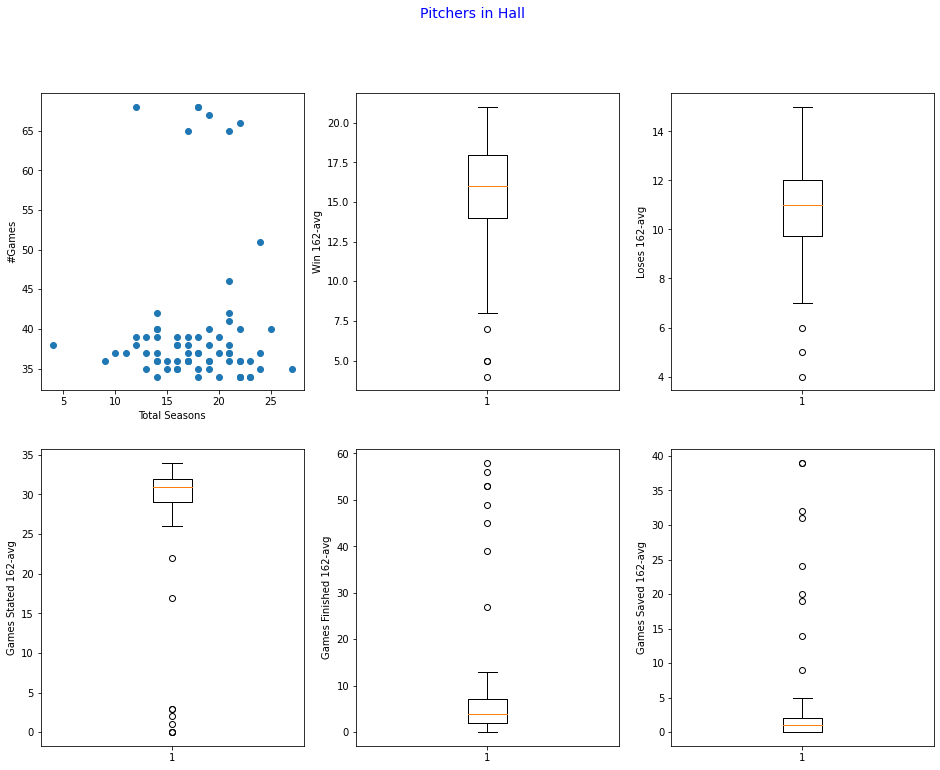

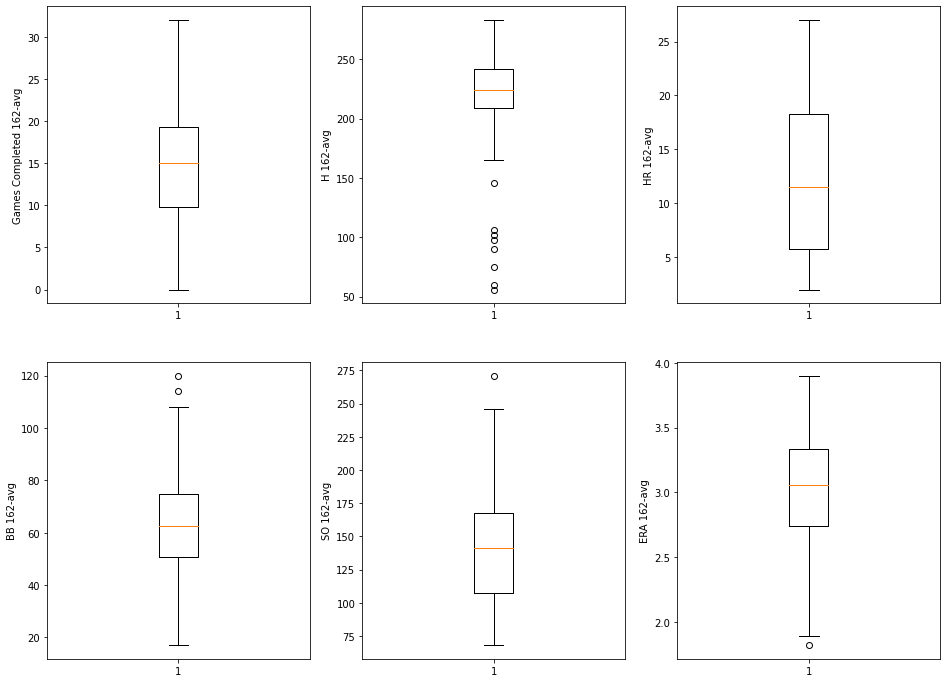

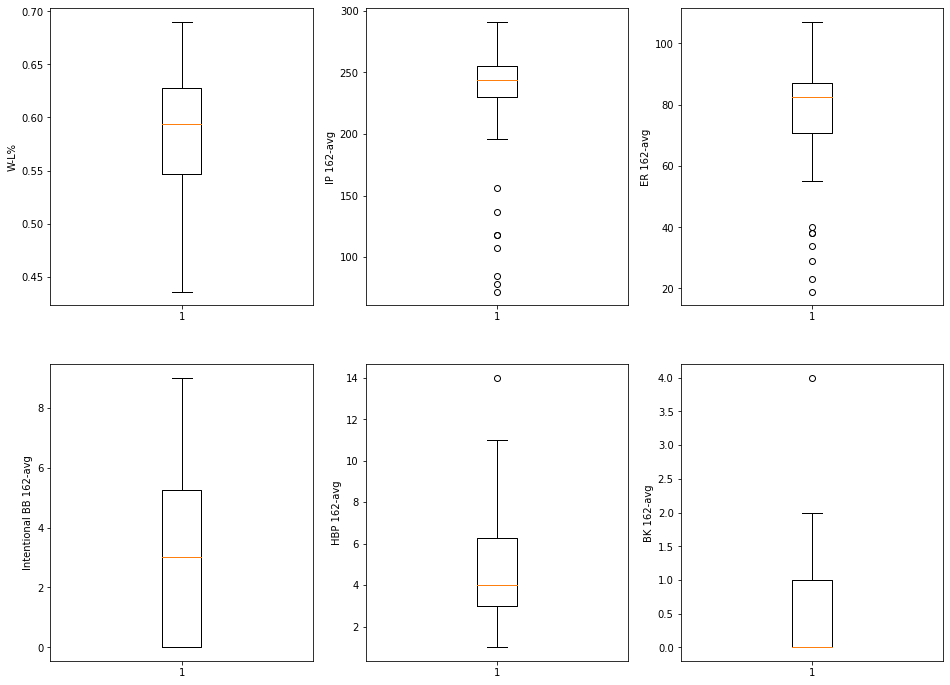

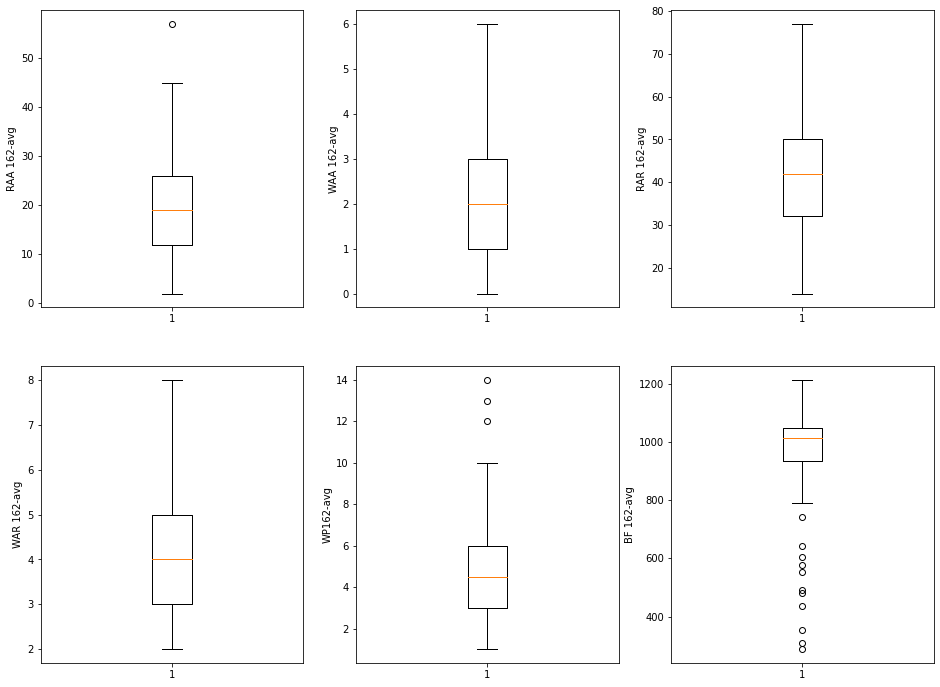

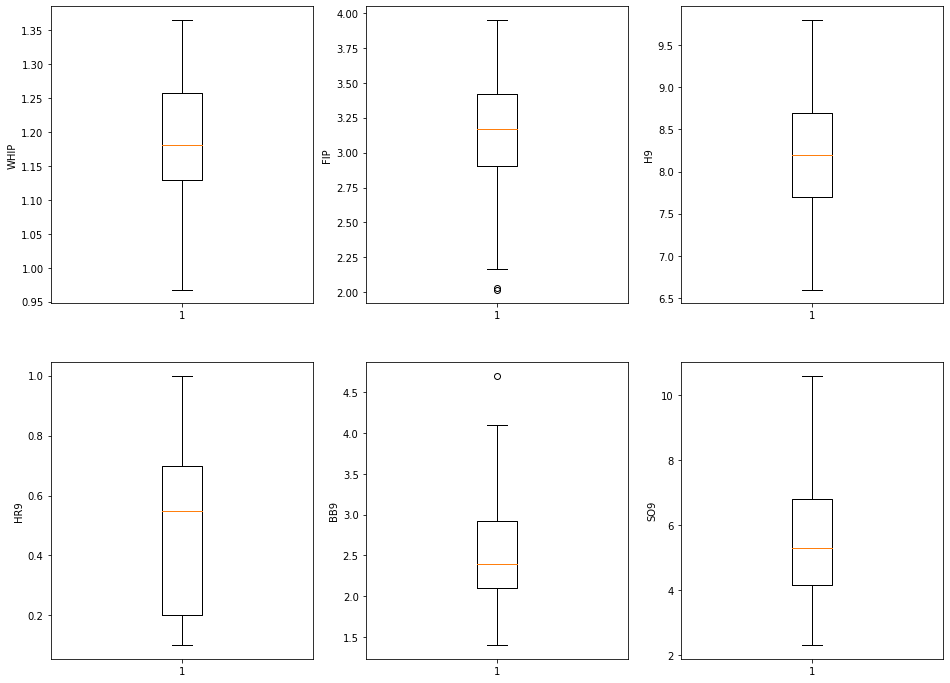

In [61]:
view_pit_stats(pitcher_in_hall,"Pitchers in Hall")

In [112]:
def complete_stats(d_player, p_type):
    stats = {}
    if p_type ==1:
        stats = d_player['pitcher_stats']
    elif p_type == 2:
        stats = d_player['batter_stats']
    for s in stats.keys():
        if stats[s].get('summary')== None:
            continue
        else:
            if isinstance(stats[s]["summary"], str):
                return False
    return True

In [113]:
batters_more_2_seassons= {k:all_batters[k] for k in all_batters.keys() if  all_batters[k]['total_seasons']>2}
batters_more_2_seassons_complete_stats = {k:batters_more_2_seassons[k] for k in batters_more_2_seassons.keys() if complete_stats(batters_more_2_seassons[k], 2)}


12975
7370
4243


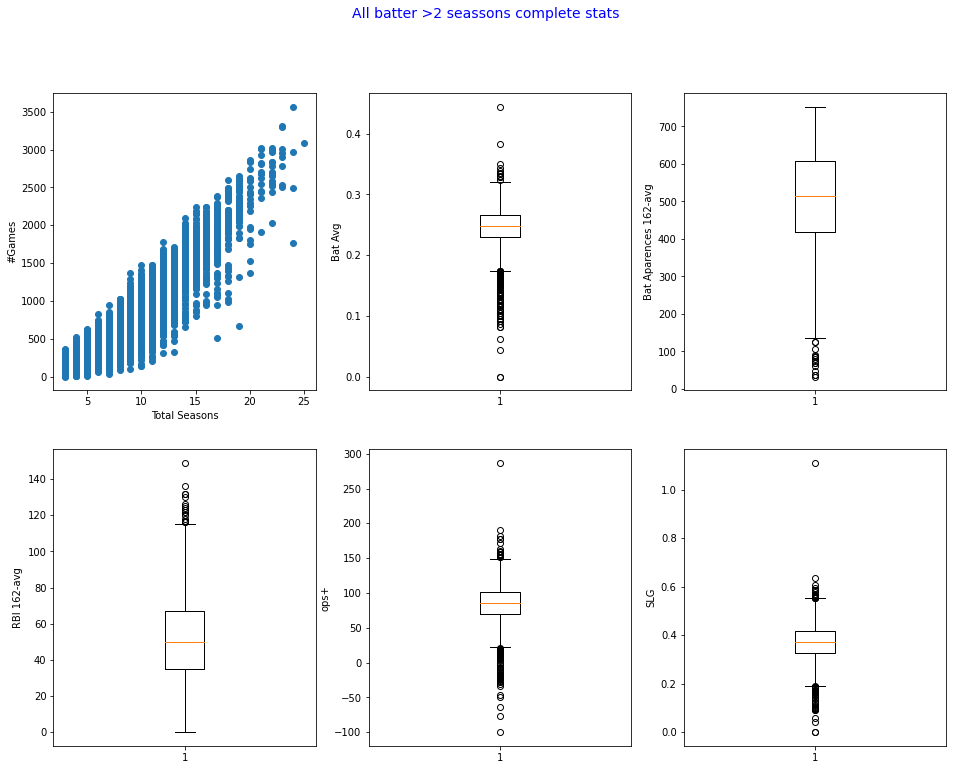

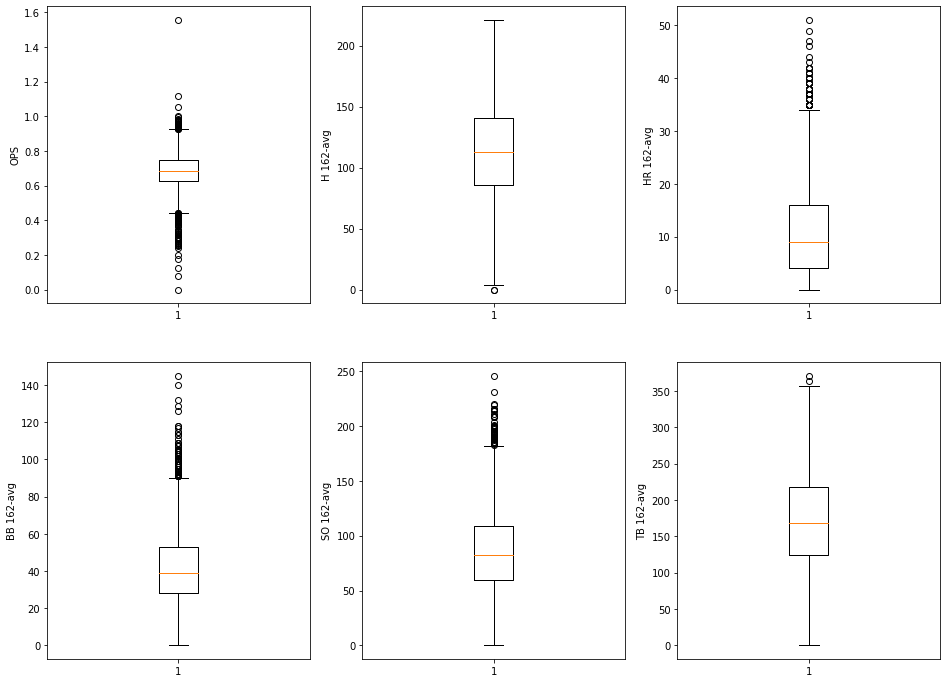

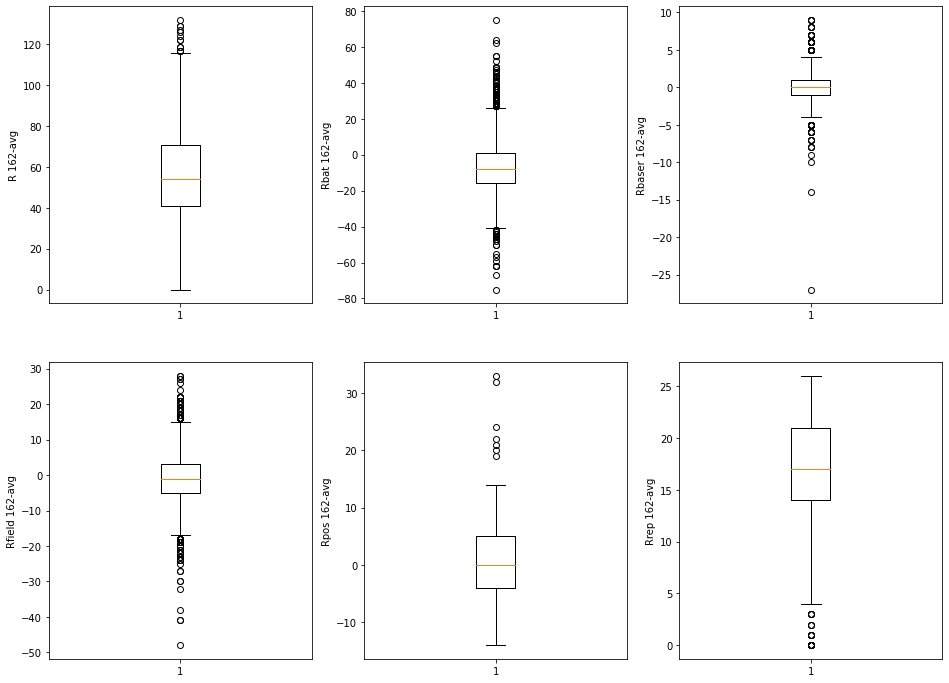

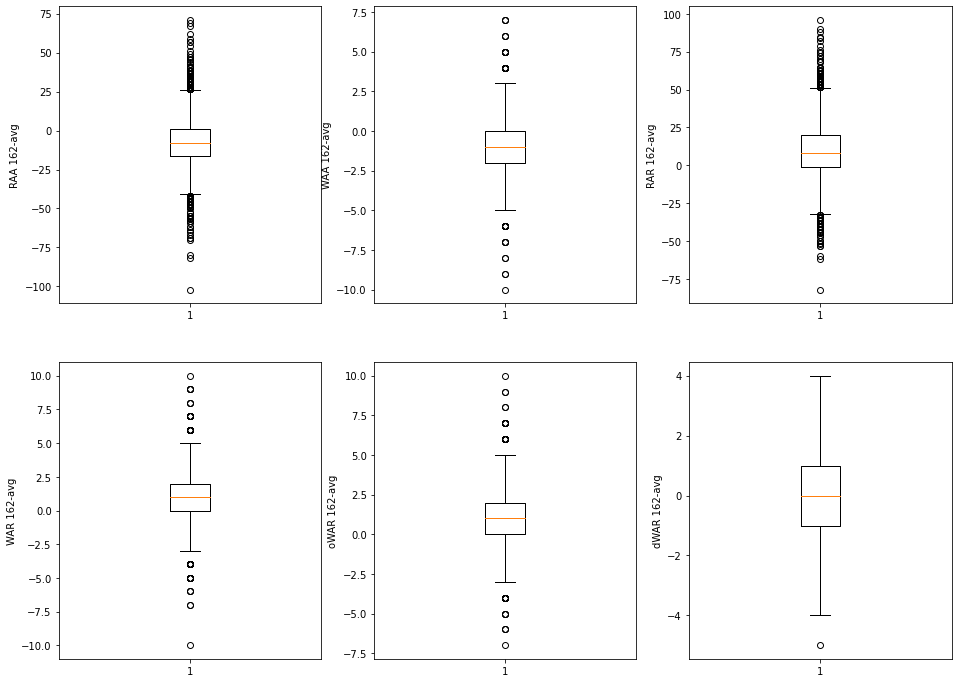

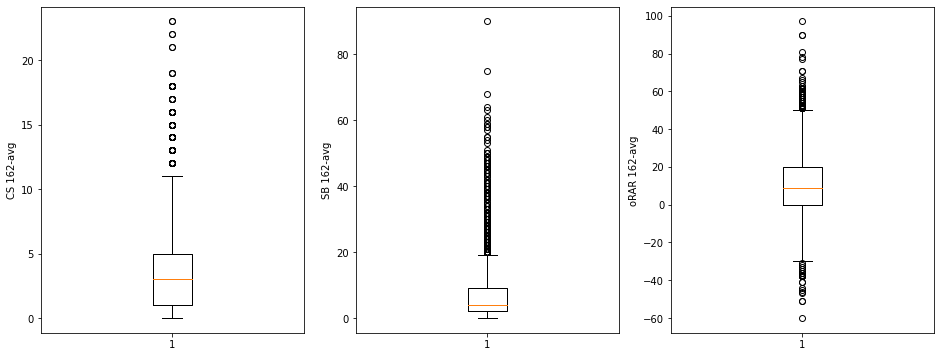

In [114]:
print(len(all_batters))
print(len(batters_more_2_seassons))
print(len(batters_more_2_seassons_complete_stats))
view_bat_stats(batters_more_2_seassons_complete_stats, "All batter >2 seassons complete stats")